# Assessment 1
## Hypothesis testing– Have investments worked?
### Summary information of the childhood obesity ratios in 2008 and 2018

In [15]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Get the data on the counts of those who developed ‘Condition X’ in 2008 and 2018
# And the populations of areas in 2008 and 2018:
data1 = pd.read_csv('coursework_1_data_2019.csv')[['2008_cases_total','2018_cases_total','2008_pop_total','2018_pop_total']]

In [18]:

#Add two new columns of the proportions of condition x in total population in 2008 and 2018
data1['proportion_of_cases_2008']=data1['2008_cases_total']/data1['2008_pop_total']*100
data1['proportion_of_cases_2018']=data1['2018_cases_total']/data1['2018_pop_total']*100

data1_2008=data1['proportion_of_cases_2008']
data1_2018=data1['proportion_of_cases_2018']

min1 = data1_2008.min()
min2 = data1_2018.min()

max1 = data1_2008.max()
max2 = data1_2018.max()

mean1 = data1_2008.mean()
mean2 = data1_2018.mean()

std1 = data1_2008.std()
std2 = data1_2018.std()

n1 = len(data1_2008)
n2 = len(data1_2018)

# print summary information of the proportion of condition x
data1.iloc[:,4:6].describe()

,proportion_of_cases_2008,proportion_of_cases_2018
count,152.000,152.000
mean,0.310,0.345
std,0.137,0.139
min,0.074,0.101
25%,0.215,0.254
50%,0.291,0.318
75%,0.365,0.407
max,0.824,0.873


### Mean Comparison Test

*Step 1: State hypothesis*

H0: The childhood obesity ratio in 2008 is the same as that in 2018.

H1: The childhood obesity ratio in 2008 is not the same as that in 2018.

*Step 2: Set significance level*

In [2]:
alpha = 0.05

*Step 3: Evidence*

The childhood obesity and the total population in 2008 and 2018.

*Step 4: Calculate the p-value*

In [3]:
# Check whether we can assume that the samples are drawn from samples with the same standard deviation or not.
std_ratio = std1/std2

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std_ratio = 0.9880741194884952
Can assume equal population standard deviations.


In [4]:
# Calculate the p-value
test_stat, p_value = sps.ttest_ind(data1_2008, data1_2018, equal_var = equal_stds)
print("p-value =", p_value)

p-value = 0.027888280286754517


*Step 5: Compare p-value and significance level*

The p-value is less than the significance level, indicating that H0 should be rejected. Therefore, the childhood obesity ratio in 2008 is significantly different from that in 2018, which means that the increase in the ratio not accidental.  

## MLR – Which kind of investment is the most effective?

In [19]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from scipy.stats import kstest
import math
import pylab as pl

pd.set_option('display.max_rows', 300)
pd.options.display.float_format = '{:40,.3f}'.format 
plt.style.use('ggplot')
%matplotlib inline

data2 = pd.read_csv('coursework_1_data_2019.csv')[['clean_air','clean_environ','health_training','school_awareness','media_awareness','sub_counselling']]
data2['increased_proportion']=data1['proportion_of_cases_2018']-data1['proportion_of_cases_2008']

### Explore the data

In [11]:
def frequency(data):
    bins = np.linspace(min(data),max(data),20)
    pl.hist(data,bins)
    pl.xlabel(f'Number of cases')
    pl.ylabel('Number of occurences')
    pl.title(f'Frequency distribution of number of cases')
    pl.show()

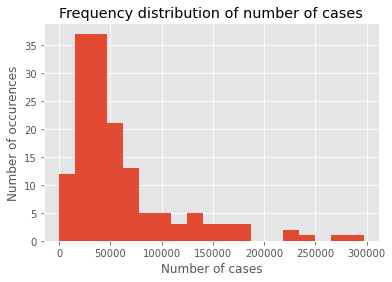

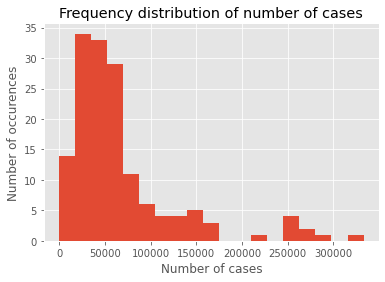

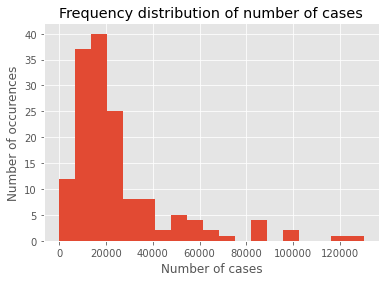

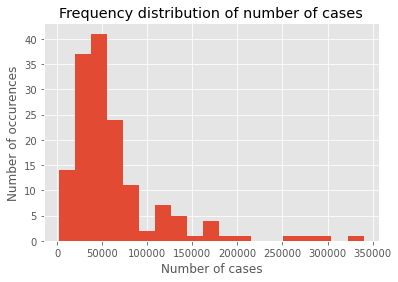

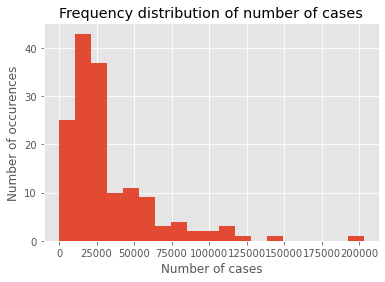

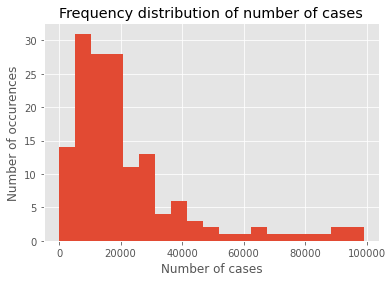

In [20]:
for x in data2.drop(columns=['increased_proportion']).columns:
    frequency(data2[x])

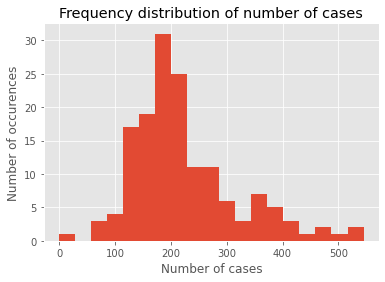

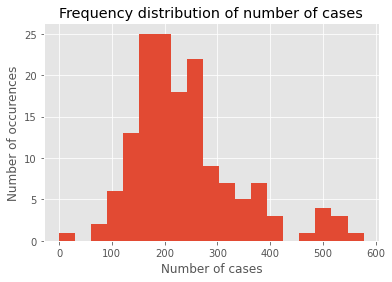

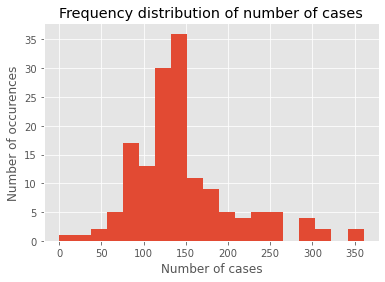

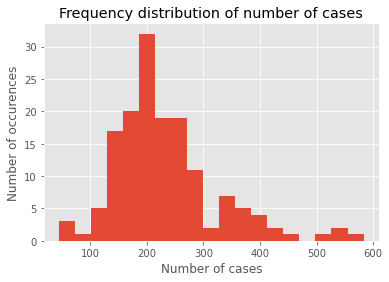

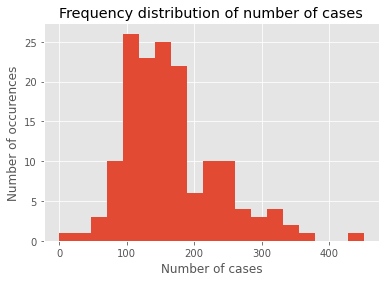

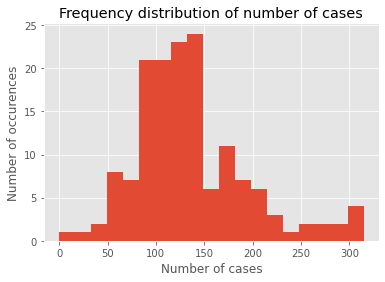

In [21]:
data2_n=pd.read_csv('test_2.csv')[['x1','x2','x3','x4','x5','x6']]

for x in data2_n.columns:
    frequency(data2_n[x])

### Multicollinearity analysis and variables selection

In [23]:
data2=data2_x
data2['increased_proportion']=data1['proportion_of_cases_2018']-data1['proportion_of_cases_2008']
data2_ols = sm.formula.ols('increased_proportion ~ x1 + x2 + x3 + x4 + x5 + x6', data2).fit()
data2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     increased_proportion   R-squared:                       0.061
Model:                              OLS   Adj. R-squared:                  0.022
Method:                   Least Squares   F-statistic:                     1.575
Date:                  Sat, 14 Nov 2020   Prob (F-statistic):              0.159
Time:                          11:13:34   Log-Likelihood:                 349.14
No. Observations:                   152   AIC:                            -684.3
Df Residuals:                       145   BIC:                            -663.1
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0421      0.006      6.822      0.000       0.030       0.054
x1         -4.677e-05   3.42e-05     -1.369      0.173      -0.000    2.08e-05
x2          1.367e-06   3.04e-05      0.045      0.964   -5.87e-05    6.15e-05
x3          -2.01e-05      5e-05     -0.402      0.689      -0.000    7.88e-05
x4         -5.716e-05    3.4e-05     -1.683      0.094      -0.000    9.96e-06
x5          8.929e-05   4.53e-05      1.969      0.051   -3.31e-07       0.000
x6          3.227e-05   6.35e-05      0.508      0.612   -9.33e-05       0.000
==============================================================================
Omnibus:                        7.561   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               10.448
Skew:                          -0.269   Prob(JB):                      0.00538
Kurtosis:                       4.166   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
def vif(x):
    X_m = np.matrix(x)
    VIF_list = [variance_inflation_factor(X_m, i) for i in range(X_m.shape[1])]
    maxvif=pd.DataFrame(VIF_list,index=x.columns,columns=["vif"])
    print(maxvif)
    print(" ")
    print(f"maxvif:{max(VIF_list)}")

data2_x=pd.read_csv('test_2.csv')[['x1','x2','x3','x4','x5','x6']]
vif(data2_x)

                                        vif
x1                                   16.865
x2                                   15.065
x3                                   14.964
x4                                   16.591
x5                                   16.426
x6                                   21.520
 
maxvif:21.51979768201316


In [25]:
vif(data2_x.drop(columns=['x2']))

                                        vif
x1                                   15.891
x3                                   14.566
x4                                   16.554
x5                                   15.578
x6                                   20.329
 
maxvif:20.32858997182509


In [26]:
vif(data2_x.drop(columns=['x2','x3']))

                                        vif
x1                                   14.785
x4                                   15.997
x5                                   14.630
x6                                   19.370
 
maxvif:19.370094280654047


In [27]:
vif(data2_x.drop(columns=['x3','x6','x2']))

                                        vif
x1                                   12.775
x4                                   14.247
x5                                   11.999
 
maxvif:14.24650637212403


In [28]:
vif(data2_x.drop(columns=['x1','x6','x2','x3']))

                                        vif
x4                                   10.000
x5                                   10.000
 
maxvif:9.99951857385671


In [29]:
data2_x_new=data2_x.drop(columns=['x1','x6','x2','x3'])

### Fit a linear model

In [31]:
data2_new=data2_x_new
data2_new['increased_proportion']=data2['increased_proportion']
data2_ols = sm.formula.ols('increased_proportion ~  x4 + x5', data2_new).fit()
data2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     increased_proportion   R-squared:                       0.045
Model:                              OLS   Adj. R-squared:                  0.032
Method:                   Least Squares   F-statistic:                     3.505
Date:                  Sat, 14 Nov 2020   Prob (F-statistic):             0.0325
Time:                          11:19:50   Log-Likelihood:                 347.83
No. Observations:                   152   AIC:                            -689.7
Df Residuals:                       149   BIC:                            -680.6
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0400      0.006      6.893      0.000       0.029       0.051
x4          -7.49e-05   2.87e-05     -2.614      0.010      -0.000   -1.83e-05
x5           7.43e-05    3.7e-05      2.006      0.047    1.11e-06       0.000
==============================================================================
Omnibus:                        4.799   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.836
Skew:                          -0.162   Prob(JB):                       0.0540
Kurtosis:                       3.903   Cond. No.                         881.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Diagnose the model

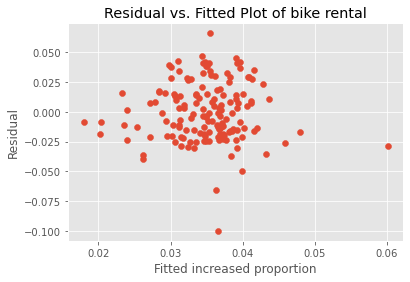

In [32]:
plt.scatter(data2_ols.fittedvalues, data2_ols.resid)
plt.xlabel('Fitted increased proportion')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of bike rental')
plt.show()